In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.datasets import MNIST
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary
from PIL import Image

In [2]:
class TorchCNN(nn.Module):
    def __init__(self):
        """
        Initialize a 3-layer CNN.

        Args:
            in_channels: number of features of the input image
            hidden_channels: list of two numbers which are number of hidden features
            out_features: number of features in output layer
        """
        super(TorchCNN, self).__init__()

        self.layers = []

        # input layer
        print('input')
        self.convi = nn.Conv2d(1, 96, kernel_size=7, stride=2, padding = 1)
        self.relui = nn.ReLU()

        self.layers = [self.convi, self.relui]
        print('layer 1')
        # hidden layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding = 1)
        self.norm1 = nn.LocalResponseNorm(96)
        self.conv1 = nn.Conv2d(96, 256, kernel_size=5, stride=2, padding = 1)
        self.relu1 = nn.ReLU()

        self.layers = self.layers + [self.pool1, self.norm1, self.conv1, self.relu1]

        # hidden layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.norm2 = nn.LocalResponseNorm(256)
        self.conv2 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding = 1)
        self.relu2 = nn.ReLU()

        self.layers = self.layers + [self.pool2, self.norm2, self.conv2, self.relu2]

        # hidden layer 3
        self.conv3 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding = 1)
        self.relu3 = nn.ReLU()

        self.layers = self.layers + [self.conv3, self.relu3]

        # hidden layer 4
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding = 1)
        self.relu4 = nn.ReLU()

        self.layers = self.layers + [self.conv4, self.relu4]

        # hidden layer 5
        self.pool5 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.layers = self.layers + [self.pool5]

        # hidden layer 6
        self.flat1 = nn.Flatten()
        self.lin6 = nn.Linear(6*6*256, 4096)

        self.layers = self.layers + [self.flat1, self.lin6]

        # hidden layer 7
        self.lin7 = nn.Linear(4096, 4096)

        self.layers = self.layers + [self.lin7]
        
        # output layer
        self.lino = nn.Linear(4096, 10)
        self.softo = nn.Softmax(dim=1)
        
        self.layers = self.layers + [self.lino, self.softo]

    def forward(self, x):
        i=0
        for layer in self.layers:
            x = layer(x)
            print(type(layer))
            print(x.size())
            if type(layer)==torch.nn.modules.conv.Conv2d:
                i+=1
                print(f'layer {i}, {type(layer)}')
        return x

In [3]:
net = TorchCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

input
layer 1


In [4]:
mnist_train = torch.load('../data/MNIST/processed/training.pt')
mnist_test = torch.load('../data/MNIST/processed/test.pt')
# fashiomnist_train = datasets.FashionMNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
# fashiomnist_test = datasets.FashionMNIST(root="data", train=False, download=True, transform=transforms.ToTensor())


In [ ]:
# fashiomnist_train = []

# for data, label in zip(mnist_train[0], mnist_train[1]):
#     fashiomnist_train.append([dat[None,:,:],label])
    
# fashiomnist_test = []

# for data, label in zip(mnist_test[0], mnist_test[1]):
#     fashiomnist_test.append([dat[None,:,:],label])
    
# train_loader = DataLoader(fashiomnist_train, batch_size=64, shuffle=True)
# test_loader = DataLoader(fashiomnist_test, batch_size=1000)

In [5]:
# fashiomnist_train = []
# i = 0
# for data, label in zip(mnist_train[0], mnist_train[1]):
#     i+=1
#     if i %1000 == 0:
#         print(f'{i}')
#     dat = rescale(data, 4, anti_aliasing=False)
#     dat = torch.Tensor(dat)
#     fashiomnist_train.append([dat[None,:,:],label])
# #     i+=1
# #     if i%10000==0:
# #         print(i)
    
# fashiomnist_test = []
# for data, label in zip(mnist_test[0], mnist_test[1]):
#     dat = rescale(data, 4, anti_aliasing=False)
#     dat = torch.Tensor(dat)
#     fashiomnist_test.append([dat[None,:,:],label])

In [40]:
transform = transforms.Compose([transforms.Resize((224,224))])
train = []
for i in range(len(mnist_train[0])//100):
    train.append(transform(mnist_train[0][i*100:i*100+100]))
    
train = torch.stack(train).view(60000,224,224)

train_data = []
for data, label in zip(train, mnist_train[1]):
    fashiomnist_train.append([data[None,:,:],label])
    
test = []
for i in range(len(mnist_test[0])//100):
    test.append(transform(mnist_test[0][i*100:i*100+100]))
    
test = torch.stack(test).view(10000,224,224)

test_data = []
for data, label in zip(test, mnist_test[1]):
    test_data.append([data[None,:,:],label])

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:73] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3010560000 bytes. Buy new RAM!

In [38]:
a = torch.stack(train)
a.view(60000,224,224).size()

torch.Size([60000, 224, 224])

In [ ]:
transform = transforms.Compose([transforms.Resize((224,224))])
fashiomnist_train = []

for data, label in zip(mnist_train[0], mnist_train[1]):
    dat = transform(data)
    fashiomnist_train.append([dat[None,:,:],label])
    
fashiomnist_test = []
for data, label in zip(mnist_test[0], mnist_test[1]):
    dat = rescale(data, 4, anti_aliasing=False)
    dat = torch.Tensor(dat)
    fashiomnist_test.append([dat[None,:,:],label])

In [142]:
train_loader = DataLoader(fashiomnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(fashiomnist_test, batch_size=1000)

In [156]:
(i1.type(torch.LongTensor)).type()

'torch.LongTensor'

In [48]:
from skimage.transform import rescale
image = i1[0][0]
image_rescaled = rescale(image, 4, anti_aliasing=False)

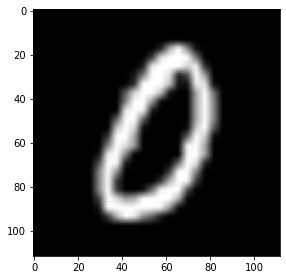

In [51]:
a = torch.Tensor(image_rescaled)
a = a[None,:,:]
a.size()
plt.figure()
plt.imshow(a.view(112, 112), cmap='gray')
plt.tight_layout()
plt.show()

In [59]:
fashiomnist_train.data[0].size()

torch.Size([28, 28])

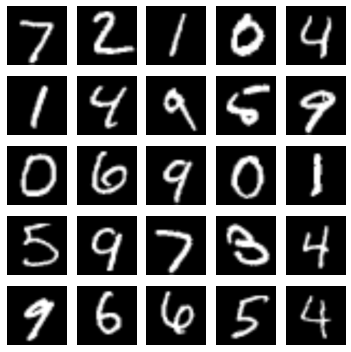

In [62]:
fig, axs = plt.subplots(5, 5, figsize=(5, 5))
for i in range(25):
    x, y = fashiomnist_test[i]
    ax = axs[i // 5][i % 5]
    ax.imshow(x.view(112, 112), cmap='gray')
    ax.axis('off')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [123]:
def try_gpu():
    """
    If GPU is available, return torch.device as cuda:0; else return torch.device
    as cpu.
    """
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu')
    return device

In [140]:
summary(net, (1,224, 224), device='cpu')

<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([2, 96, 110, 110])
layer 1, <class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
torch.Size([2, 96, 110, 110])
<class 'torch.nn.modules.pooling.MaxPool2d'>
torch.Size([2, 96, 55, 55])
<class 'torch.nn.modules.normalization.LocalResponseNorm'>
torch.Size([2, 96, 55, 55])
<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([2, 256, 27, 27])
layer 2, <class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
torch.Size([2, 256, 27, 27])
<class 'torch.nn.modules.pooling.MaxPool2d'>
torch.Size([2, 256, 13, 13])
<class 'torch.nn.modules.normalization.LocalResponseNorm'>
torch.Size([2, 256, 13, 13])
<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([2, 384, 13, 13])
layer 3, <class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
torch.Size([2, 384, 13, 13])
<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([2, 384, 13, 13])
layer 4, <class 'torch.nn.modules.conv.Conv2

In [158]:
l1.type()

'torch.LongTensor'

In [159]:
epochs = 15

# Define list to store losses and performances of each iteration
train_losses = []
train_accs = []
test_accs = []

# Try using gpu instead of cpu
device = try_gpu()

for epoch in range(epochs):

    # Network in training mode and to device
    net.train()
    net.to(device)

    # Training loop
    for i, (x_batch, y_batch) in enumerate(train_loader):
        
        print(f'batch {i}')

        # Set to same device
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_batch = y_batch.type(torch.FloatTensor) 

        # Set the gradients to zero
        optimizer.zero_grad()

        # Perform forward pass
        y_pred = net(x_batch)

        # Compute the loss
        loss = criterion(y_pred, y_batch)
        train_losses.append(loss)
        
        # Backward computation and update
        loss.backward()
        optimizer.step()

    # Compute train and test error
    train_acc = 100*evaluate_accuracy(train_loader, net.to('cpu'))
    test_acc = 100*evaluate_accuracy(test_loader, net.to('cpu'))
    
    # Development of performance
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    # Print performance
    print('Epoch: {:.0f}'.format(epoch+1))
    print('Accuracy of train set: {:.00f}%'.format(train_acc))
    print('Accuracy of test set: {:.00f}%'.format(test_acc))
    print('')

batch 0
<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([64, 96, 54, 54])
layer 1, <class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
torch.Size([64, 96, 54, 54])
<class 'torch.nn.modules.pooling.MaxPool2d'>
torch.Size([64, 96, 27, 27])
<class 'torch.nn.modules.normalization.LocalResponseNorm'>
torch.Size([64, 96, 27, 27])
<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([64, 256, 13, 13])
layer 2, <class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
torch.Size([64, 256, 13, 13])
<class 'torch.nn.modules.pooling.MaxPool2d'>
torch.Size([64, 256, 6, 6])
<class 'torch.nn.modules.normalization.LocalResponseNorm'>
torch.Size([64, 256, 6, 6])
<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([64, 384, 6, 6])
layer 3, <class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
torch.Size([64, 384, 6, 6])
<class 'torch.nn.modules.conv.Conv2d'>
torch.Size([64, 384, 6, 6])
layer 4, <class 'torch.nn.modules.conv.

RuntimeError: mat1 dim 1 must match mat2 dim 0